In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

# Conclusion

In this project, we examined data for churn prediction. We've tested three different models to predict the 'churn_risk_score': Logistic Regression, Decision Tree, and CatBoost. To compare the models' performance, we chose Precision, Recall, F1 and ROC AUC metric.

Let's have a look at how our models perform.

In [4]:
df_metrics = pd.read_pickle('./data/df_metrics.pkl')
print(df_metrics)

                                   model  accuracy  precision    recall  \
logreg_youden              logreg_youden  0.883386   0.939331  0.839905   
logreg_max_F1              logreg_max_F1  0.872876   0.829390  0.964806   
logreg_st_threshold  logreg_st_threshold  0.855744   0.851252  0.890447   
dtree                              dtree  0.936654   0.954039  0.928288   
catboost                        catboost  0.937518   0.936342  0.949722   

                           F1   ROC_AUC  
logreg_youden        0.886840  0.953799  
logreg_max_F1        0.891988  0.953799  
logreg_st_threshold  0.870409  0.953799  
dtree                0.940987  0.975058  
catboost             0.942985  0.975934  


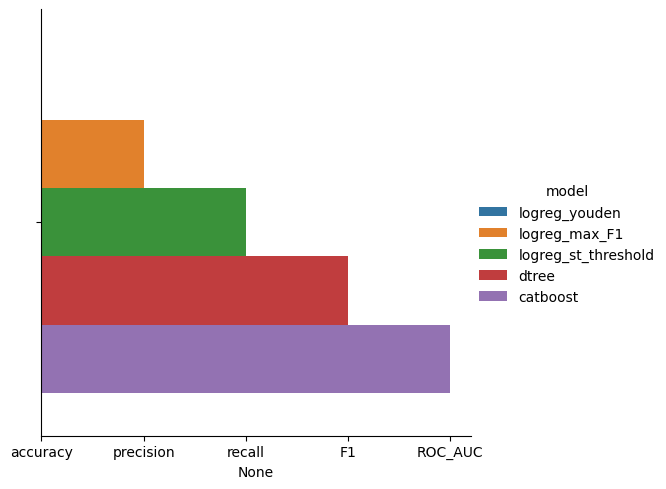

In [ ]:
scores = df_metrics.columns.drop('model')

sns.catplot(data=df_metrics, kind='bar', hue='model', x=scores)

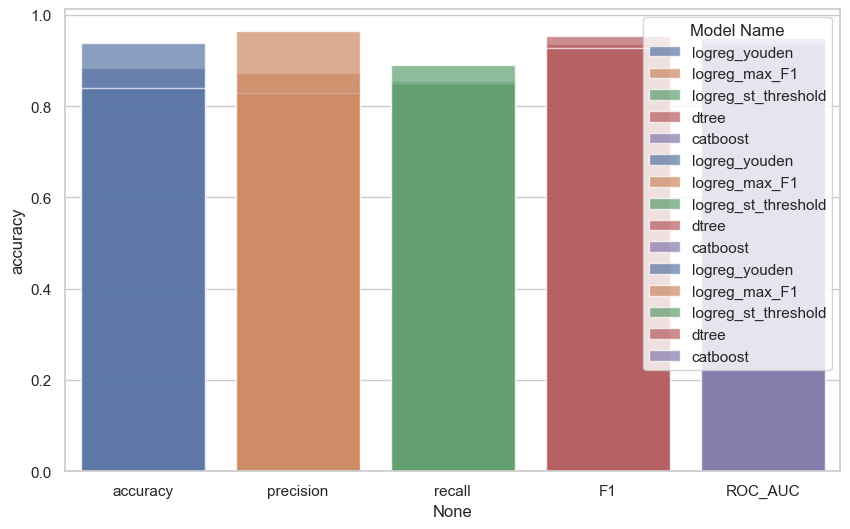

In [ ]:
# Define the style of the plot
sns.set(style="whitegrid")
# Set up the figure and axis
plt.figure(figsize=(10, 6))
# Plot the grouped barplot
sns.barplot(data=df_metrics, y=scores[0], x=scores, hue="model", alpha=0.7, dodge=False)
sns.barplot(data=df_metrics, y=scores[1], x=scores, hue="model", alpha=0.7, dodge=False)
sns.barplot(data=df_metrics, y=scores[2], x=scores, hue="model", alpha=0.7, dodge=False)
# Add legend
plt.legend(title='Model Name')
# Show plot
plt.show()

<Axes: >

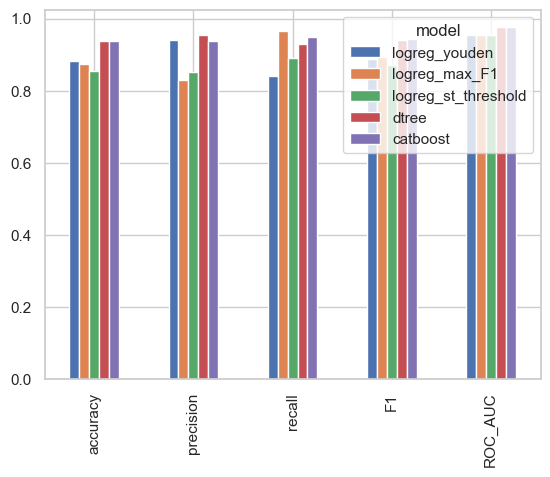

In [ ]:

df_metrics.transpose().plot(kind='bar')

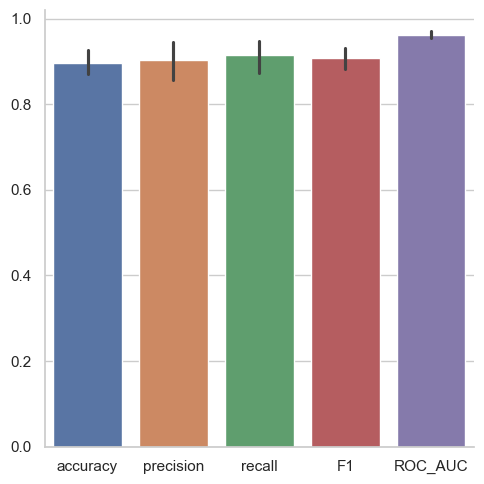

In [ ]:
sns.catplot(data=df_metrics, kind='bar', dodge=False)

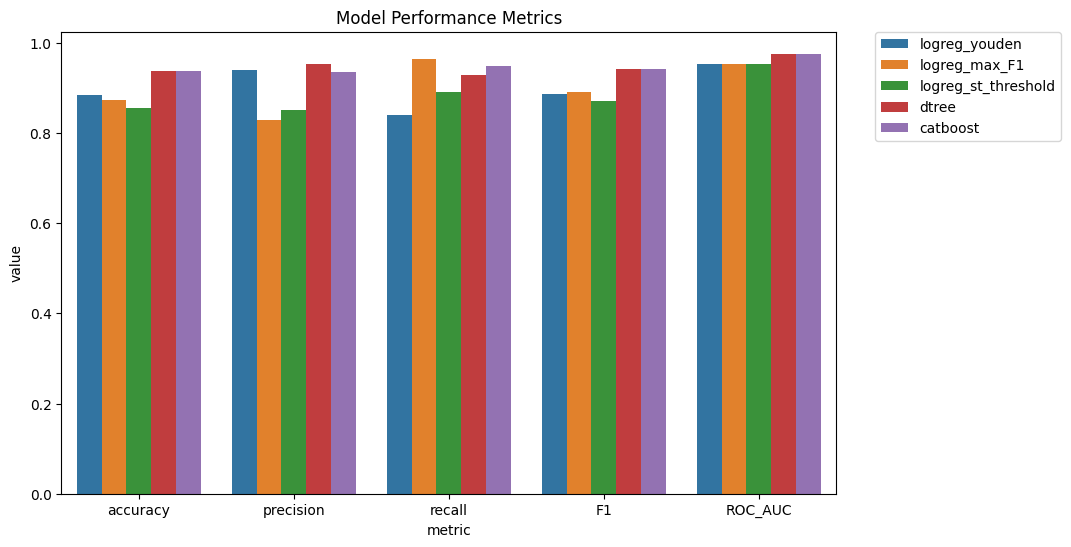

In [10]:
# melt the DataFrame, to convert it to long-formates 
df_melted = df_metrics.melt(id_vars='model', var_name='metric', value_name='value')

# Create Barplot
plt.figure(figsize=(10,6))
sns.barplot(x='metric', y='value', hue='model', data=df_melted)
plt.title('Model Performance Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [11]:
df_melted

,model,metric,value
0,logreg_youden,accuracy,0.883386
1,logreg_max_F1,accuracy,0.872876
2,logreg_st_threshold,accuracy,0.855744
3,dtree,accuracy,0.936654
4,catboost,accuracy,0.937518
5,logreg_youden,precision,0.939331
6,logreg_max_F1,precision,0.829390
7,logreg_st_threshold,precision,0.851252
8,dtree,precision,0.954039
9,catboost,precision,0.936342


columns: model


- Overview von Scores der verschiedenen Modelle
- Feature Importance Vergleichen
    - Graphiken exportieren in Modell Notebooks und hier nebeneinander darstellen
    - Top 3 Feature nennen, sonstige Auffälligkeiten
- Fehlerauswertung, systematische Fehler?
- Empfehlung für Modell aussprechen anhand eines Use Cases
    - Vorteil Logistic ist dass es tunable vor Use Case
    - Vorteil decision tree ist dass es genauer ist und White box
    - ?? Ist catboost wirklich besser in diesem Fall?? Sonst reicht auch Decision tree vermutlich


- hyperparameter tuning -> default parameter liefern schon sehr gute Werte
- error analysis


- in notebooks mehr beschreiben
- Scores innerhalb von 05 besser erklären/ interpretieren/ wie zufrieden mit dem Wert?

# To Do (from data cleaning)

### features to be further examined:
- 'feedback' group by positive and negative feedback

Next steps/second iteration:
- https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6
- https://www.datacamp.com/tutorial/categorical-data

explain threshold and scores from Logist Regression